In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from matplotlib.animation import FuncAnimation
from IPython.display import display, clear_output, Image
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
%matplotlib notebook

In [29]:
class DiffusionEquation:
#diffusion equation finite difference technique
    def __init__(self, initial_lattice,dt, store_history=False):
        self.initial_lattice = initial_lattice
        self.n, self.m = initial_lattice.shape
        #this only works with square matrices for now
        self.dx=2/self.n
        self.store_history = store_history
        self.dt=dt
    

    def update_grid(self, grid):
        #updates grid based on finite differences for diffusion truncate error: o(dx)
        #there is an alternate method that is vectorized where the grid is squished into a vector and the finite differences
        #are elements of a matrix operating on the vector as a markov chain, the matrix is very sparse actually, but these methods are probably faster
        n=self.n
        dx=self.dx
        dt=self.dt
        #no for loops!
        #grid=grid+(-4*0.01*dt*grid/(dx**2))+((0.01*dt/(dx**2))*(np.roll(grid,-1,axis=0)+np.roll(grid,1,axis=0)+np.roll(grid,-1,axis=1)+np.roll(grid,1,axis=-1)))
        #above comment is an alternative implementation, still vectorized, and still basically a manual convolution if you dont want to use scipy
        from scipy.signal import convolve2d
        kernel=np.array([[0, (0.01*dt/(dx**2)), 0], [(0.01*dt/(dx**2)), (-4*0.01*dt/(dx**2)), (0.01*dt/(dx**2))], [0, (0.01*dt/(dx**2)), 0]])
        grid=grid+convolve2d(grid,kernel,mode='same')
        grid[0, :] = np.zeros(n)
        grid[-1, :] = np.zeros(n)
        grid[:, 0] = np.zeros(n)
        grid[:, -1] = np.zeros(n)
        return grid


In [30]:
# Define initial lattice and complex boundary conditions
n_x = 60
initial_lattice = np.random.rand(n_x, n_x)-np.random.rand(n_x, n_x)

initial_lattice[0, :] = np.zeros(n_x)
initial_lattice[-1, :] = np.zeros(n_x)
initial_lattice[:, 0] = np.zeros(n_x)
initial_lattice[:, -1] = np.zeros(n_x)
X=np.linspace(-1,1,n_x)
Y=np.linspace(-1,1,n_x)
Xgrid,Ygrid=np.meshgrid(X,Y)



<IPython.core.display.Javascript object>


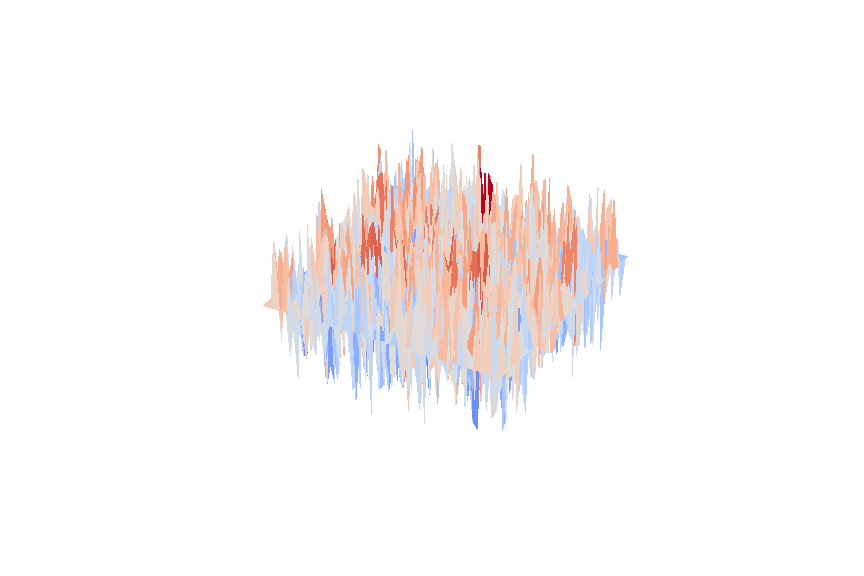

<function matplotlib.pyplot.show(block=None)>

In [31]:
##plots initial condition
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(Xgrid, Ygrid, initial_lattice, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlim(-1.01, 1.01)
ax.xaxis.set_major_locator(LinearLocator(10))
ax.xaxis.set_major_formatter('{x:.02f}')
ax.set_ylim(-1.01, 1.01)
ax.yaxis.set_major_locator(LinearLocator(10))
ax.yaxis.set_major_formatter('{x:.02f}')
ax.axis('off')
plt.show

<IPython.core.display.Javascript object>


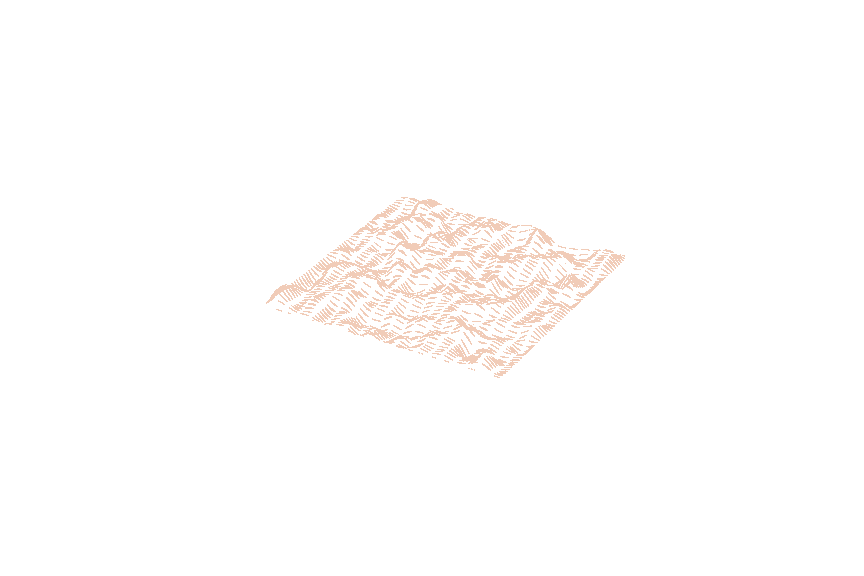

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [32]:
dt = 0.005

# Create the diffusion simulation
diffusionSim = DiffusionEquation(initial_lattice, dt)

# Create the time array
time = np.arange(0, 1, dt)

# Generate the Zarray
grid = initial_lattice
Zarray = np.zeros((n_x, n_x, len(time)))

for a in range(len(time)):
    Zarray[:, :, a] = grid
    grid = diffusionSim.update_grid(grid)

# Create the figure and the 3D axes
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
# Set the limits and labels for the axes
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlim(-1.01, 1.01)
ax.xaxis.set_major_locator(LinearLocator(10))
ax.xaxis.set_major_formatter('{x:.02f}')
ax.set_ylim(-1.01, 1.01)
ax.yaxis.set_major_locator(LinearLocator(10))
ax.yaxis.set_major_formatter('{x:.02f}')
ax.axis('off')

# Create the initial surface plot
X = np.linspace(-1, 1, n_x)
Y = np.linspace(-1, 1, n_x)
Xgrid, Ygrid = np.meshgrid(X, Y)

surf = ax.plot_surface(Xgrid, Ygrid, Zarray[:, :, 0], cmap=cm.coolwarm,linewidth=1, antialiased=False)
def Plot_update(b,Zarray):
    # Generate new data for the plot
    X=np.linspace(-1,1,n_x)
    Y=np.linspace(-1,1,n_x)
    Xgrid,Ygrid=np.meshgrid(X,Y)
    Z=Zarray[:,:,b]
    # Update the plot with the new data
    #surf.set_data(Xgrid, Ygrid)
    surf.set_verts(list(zip(Xgrid.flat, Ygrid.flat, Z.flat)))
    #surf.set_3d_properties(Z)
# Create the animation
anim = FuncAnimation(fig, Plot_update, frames=np.arange(0, int(len(time)/5)),
                     interval=100, blit=False, fargs=(Zarray,))

from IPython.display import HTML
HTML(anim.to_jshtml())


NameError: name 'LaplaceEquationDisk' is not defined